# Exploratory Data Analysis of Financial Companies

In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_pickle('all_banks') 

In [4]:
df.head().transpose()

Date                     2006-01-03   2006-01-04   2006-01-05   2006-01-06  \
Bank Ticker Stock Info                                                       
BAC         Open              46.92        47.00        46.58        46.80   
            High              47.18        47.24        46.83        46.91   
            Low               46.15        46.45        46.32        46.35   
            Close             47.08        46.58        46.64        46.57   
            Volume      16296700.00  17757900.00  14970900.00  12599800.00   
C           Open             490.00       488.60       484.40       488.80   
            High             493.80       491.00       487.80       489.00   
            Low              481.10       483.50       484.00       482.00   
            Close            492.90       483.80       486.20       486.20   
            Volume       1537660.00   1871020.00   1143160.00   1370250.00   
GS          Open             126.70       127.35       126.00       127.29   
            High             129.44       128.91       127.32       129.25   
            Low              124.23       126.38       125.61       127.29   
            Close            128.87       127.09       127.04       128.84   
            Volume       6188700.00   4862000.00   3717600.00   4319600.00   
JPM         Open              39.83        39.78        39.61        39.92   
            High              40.36        40.14        39.81        40.24   
            Low               39.30        39.42        39.50        39.55   
            Close             40.19        39.62        39.74        40.02   
            Volume      12839400.00  13491800.00   8109400.00   7966900.00   
MS          Open              57.17        58.70        58.55        58.77   
            High              58.49        59.28        58.59        58.85   
            Low               56.74        58.35        58.02        58.05   
            Close             58.31        58.35        58.51        58.57   
            Volume       5377000.00   7977800.00   5778000.00   6889800.00   
WFC         Open              31.60        31.80        31.50        31.58   
            High              31.98        31.82        31.56        31.78   
            Low               31.20        31.36        31.31        31.38   
            Close             31.90        31.53        31.50        31.68   
            Volume      11016400.00  10871000.00  10158000.00   8403800.00   

Date                     2006-01-09  
Bank Ticker Stock Info               
BAC         Open              46.72  
            High              46.97  
            Low               46.36  
            Close             46.60  
            Volume      15620000.00  
C           Open             486.00  
            High             487.40  
            Low              483.00  
            Close            483.90  
            Volume       1680740.00  
GS          Open             128.50  
            High             130.62  
            Low              128.00  
            Close            130.39  
            Volume       4723500.00  
JPM         Open              39.88  
            High              40.72  
            Low               39.88  
            Close             40.67  
            Volume      16575200.00  
MS          Open              58.63  
            High              59.29  
            Low               58.62  
            Close             59.19  
            Volume       4144500.00  
WFC         Open              31.68  
            High              31.82  
            Low               31.56  
            Close             31.68  
            Volume       5619600.00

In [5]:
bank_stocks=df

In [6]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [7]:
q=bank_stocks.xs(key='Close',axis=1,level='Stock Info')
q.max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [8]:
returns=pd.DataFrame()
tickers=['BAC','C','GS','JPM','MS','WFC']

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [9]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

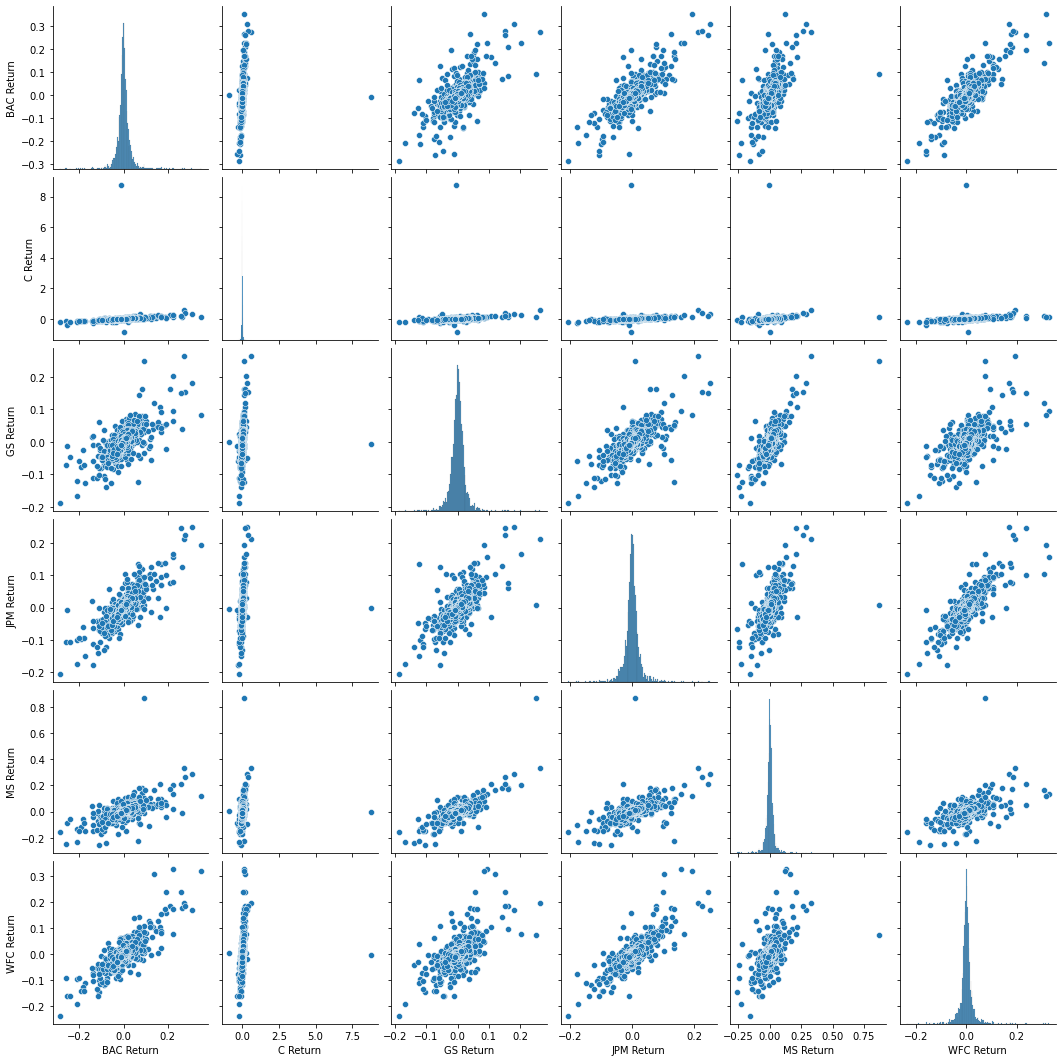

In [10]:
import seaborn as sns
sns.pairplot(returns[1:])

In [11]:
#worst-performing-day
returns.idxmin() #4 banks have the same worst performing day.. Inaugration Day(obama)

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [12]:
#best-performing-day
returns.idxmax() # in the timeframe, citi bank's stock split.

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [13]:
#risk-factor
returns.std() # citi bank stock is the riskiest

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [14]:
returns.loc['2015-01-01':'2015-12-31'].std() # for 2015, BAC or MS can be the riskiest.

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\Rohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

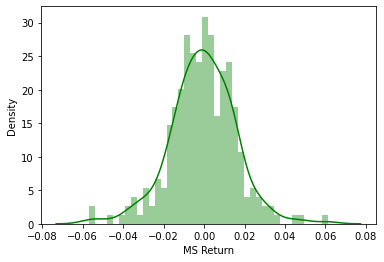

In [15]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=40)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\Rohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

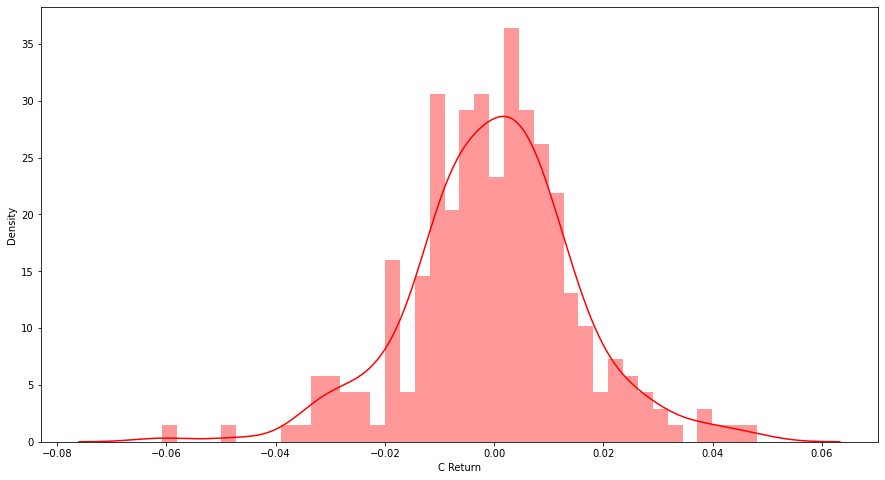

In [16]:
plt.figure(figsize=(15,8))
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['C Return'],color='red',bins=40)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [18]:
q.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


<AxesSubplot:xlabel='Date'>

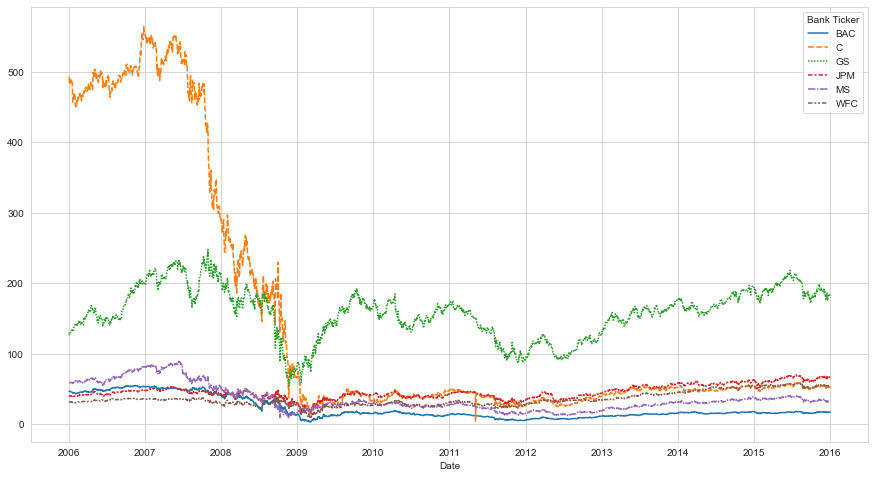

In [19]:
plt.figure(figsize=(15,8))
sns.lineplot(data=q)

In [20]:
pre=bank_stocks.xs('MS',axis=1,level='Bank Ticker')
pre.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,57.17,58.49,56.74,58.31,5377000
2006-01-04,58.70,59.28,58.35,58.35,7977800
2006-01-05,58.55,58.59,58.02,58.51,5778000
2006-01-06,58.77,58.85,58.05,58.57,6889800
2006-01-09,58.63,59.29,58.62,59.19,4144500


<AxesSubplot:xlabel='Close', ylabel='Open'>

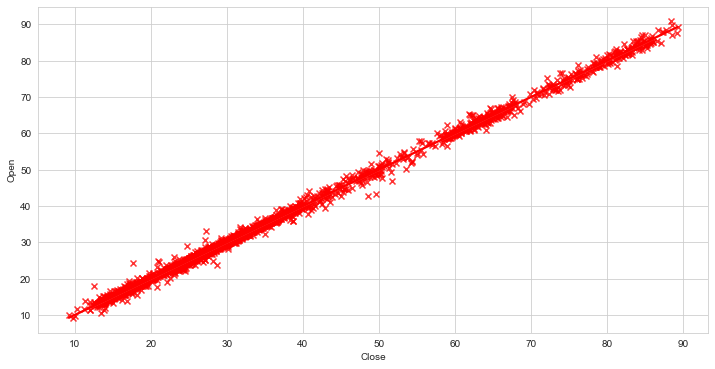

In [21]:
plt.figure(figsize=(12,6))
sns.regplot(data=pre,x='Close',y='Open',color='red',marker='x')

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

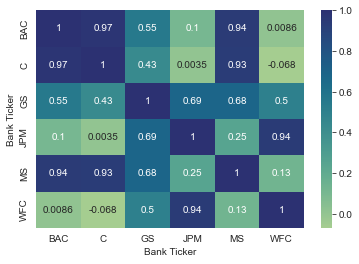

In [22]:
hm=bank_stocks.xs(key='Close',axis=1,level='Stock Info')
sns.heatmap(data=hm.corr(),cmap='crest',annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

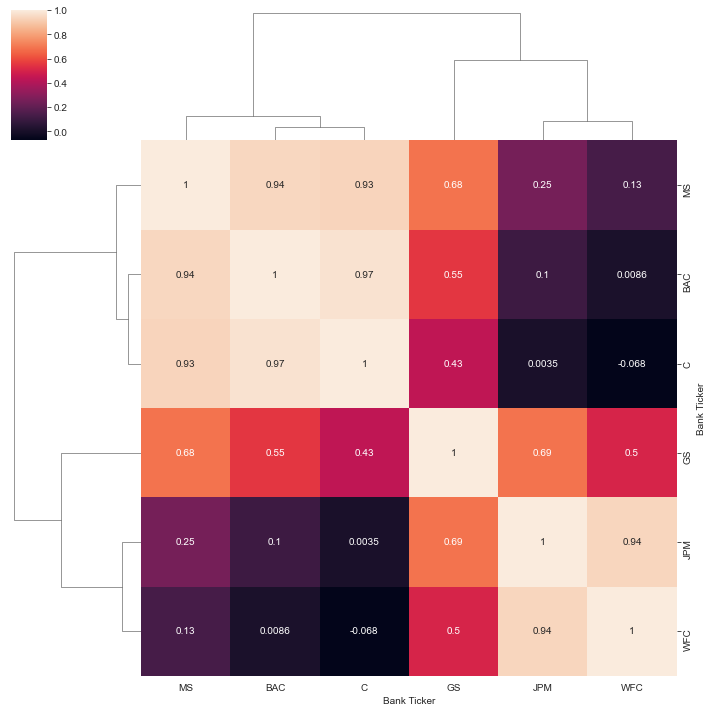

In [23]:
sns.clustermap(data=hm.corr(),annot=True)